# matplotlib で TimeSeries Data をプロットするときの軸の設定方法

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # 今回のキーパーソン（おぶじぇくと）
import seaborn as sns

%matplotlib inline

時系列データで軸を設定する際、```matplotlib.dates```から関数を呼び出せるととても便利

## ひこうきの旅客数データ

In [2]:
# こちらからデータをとってきた
# https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html
df = pd.read_csv('../input/AirPassengers.csv')

In [3]:
df.shape

(144, 2)

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


## とりあえずプロットしてみる

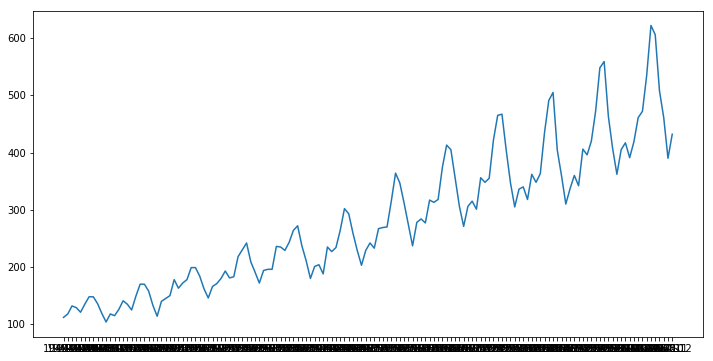

In [6]:
plt.figure(figsize=(12, 6)) # とりあえずいい感じのサイズ感にしてくれる
plt.plot(df.Month, df['#Passengers']); # とりあえずプロットできる

初心者あるある。  
こういう時、データの型がtimeSeriesになってない可能性が高い。  

In [7]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

ねっ。  
文字列だとプロットまでズレるので、pd.to_datetimeで変換しましょう。  
補足 : read_csvで読み込み時に変換する方法もある

In [8]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

format指定すると動作がかるくなる  
指定しない場合、```dateutil.parser.parse```を呼んでよしなに変換してくれるが動作が重くなる原因となる。  
レコード数が増えると死ぬ。
積極的にformat指定しよう。

## もっかいプロット

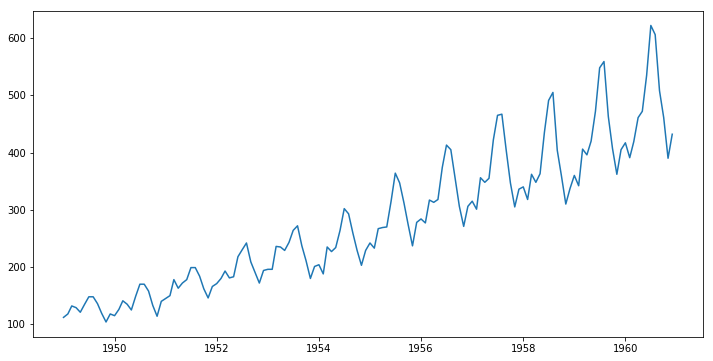

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['#Passengers']);

Month列が文字列だった時よりも動作が軽くなる。

## せめてグリッドくらいつけてあげよう

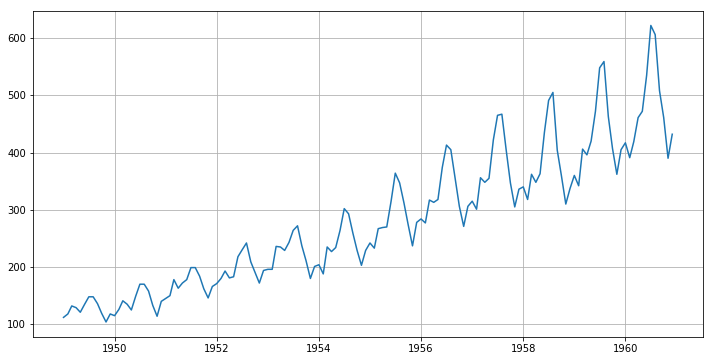

In [10]:
fig, ax = plt.subplots(figsize=(12, 6)) # 細かい設定のためにfig と ax を指定する

plt.plot(df['Month'], df['#Passengers'])

ax.grid(True); # grid を True にする（そのまんま）

matplotlibには、  
- Figureオブジェクト  
- Axesオブジェクト  
- Axisオブジェクト  

がある。（参考資料参照）  
細かい設定をする場合はそれぞれを呼び出せるようにする。  
そのための```fig, ax = hogehoge```  

## ちっちゃい目盛りを与える
もうすこし目安が欲しいですもんね

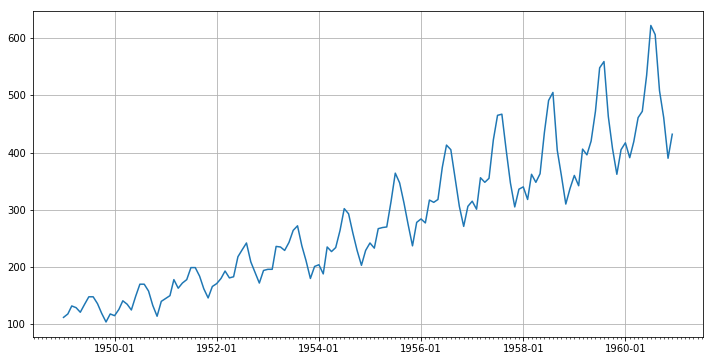

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

months = mdates.MonthLocator() # 月の設定
years = mdates.YearLocator() # 年の設定
tickFmt = mdates.DateFormatter('%Y-%m') # 軸ラベルに与える表示フォーマットの指定

plt.plot(df['Month'], df['#Passengers'])

ax.grid(True)
ax.xaxis.set_major_formatter(tickFmt) # おっきい目盛りの指定（そもそもが年単位になっていた）
ax.xaxis.set_minor_locator(months) # ちっちゃい目盛りの指定

ここから```Formatter()```と```Locator()```を呼んでいる。  
``Formatter()``は軸に表示するラベル（ここでいうと"1952-01"みたいな）、  
``Locator()``は軸の目盛りを操作する。  

```DateFormatter()```で軸の目盛りに表示するラベルの設定。  

```set_major_formatter```で「大きい目盛りのフォーマット設定」  
```set_minor_locator```で「小さい目盛りを何単位で打つかの設定」  

ただ、このままだと微妙すぎる

## ちっちゃい目盛りをへらしてラベルをつける
さっきのだとどこが何月かわかりませんしね

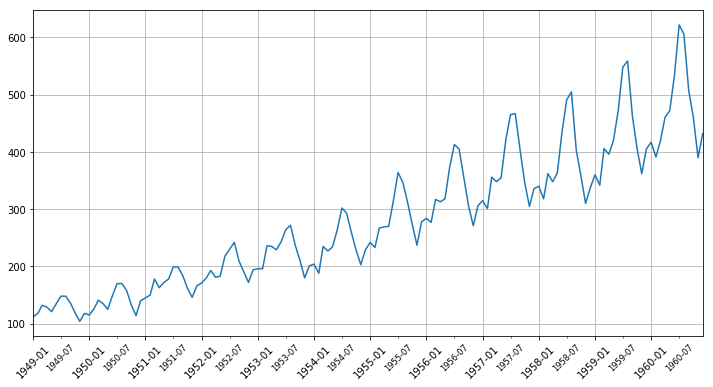

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

months = mdates.MonthLocator(bymonth=7) # bymonth指定で毎年何月の目盛りをふるか指定できる
years = mdates.YearLocator()
tickFmt = mdates.DateFormatter('%Y-%m')

plt.plot(df['Month'], df['#Passengers'])

ax.grid(True)
ax.xaxis.set_major_formatter(tickFmt)
ax.xaxis.set_minor_formatter(tickFmt) # ちっちゃいめもりにもラベルかいてね！
ax.xaxis.set_major_locator(years) # なくても良い（統一感なくて気持ち悪かったので書いた）
ax.xaxis.set_minor_locator(months)
ax.tick_params(axis='x', which='minor', rotation=45, labelsize='small') # ちっちゃいめもりのラベル設定
plt.xlim(df['Month'].min(), df['Month'].max()) # ついでに枠いっぱいいっぱい書くようにした
plt.xticks(rotation=45); # これ書かないとおっきい目盛りは回転しくれない

```set_major_formatter```で大きい目盛りのラベルを指定できたなら、  
```set_minor_formatter```で小さい目盛りのラベルが指定できる。  

てことは、  

```set_minor_locator```で小さい目盛りの間隔を指定できたなら、  
```set_major_locator```で大きい目盛りの間隔も指定できる。  

```major```と```minor```が肝。  

文字の回転については上のように書くと出来る。

コード上部で指定した```MonthLocator(bymonth=7)```は毎年7月にメモリをつける準備をしてくださいねという命令。

## ちっちゃい目盛りにグリッド線を与える
あんだけやっても「見にくい」とケチをつけられたときの為に。

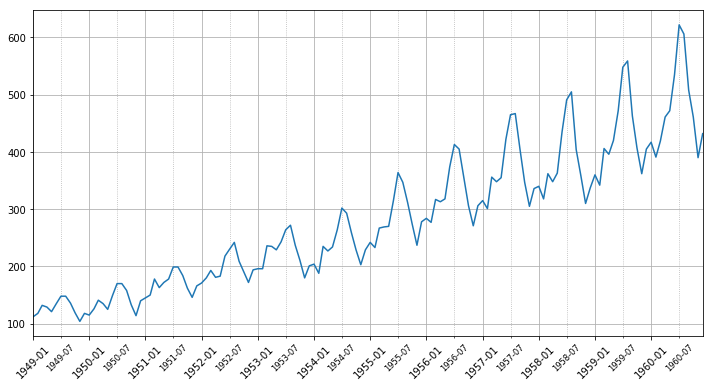

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

months = mdates.MonthLocator(bymonth=7)
years = mdates.YearLocator()
tickFmt = mdates.DateFormatter('%Y-%m')

plt.plot(df['Month'], df['#Passengers'])

ax.grid(which='major') # ここをいじってあげる
ax.grid(which='minor', linestyle=':') # ちっちゃい軸に対するグリッドの設定
ax.xaxis.set_major_formatter(tickFmt)
ax.xaxis.set_minor_formatter(tickFmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
ax.tick_params(axis='x', which='minor', rotation=45, labelsize='small')
plt.xlim(df['Month'].min(), df['Month'].max())
plt.xticks(rotation=45);

```ax.grid```に```major```と```minor```を設定してあげると各々についてのグリッド線が設定できる。

## ちっちゃい目盛りを四半期ごとに与える
これまでのノウハウを集約してみると

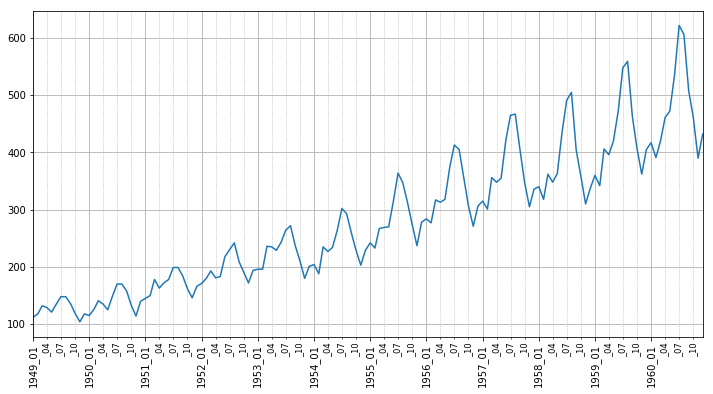

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

months = mdates.MonthLocator(bymonth=[4, 7, 10]) # こいつをリストで指定すると良い
years = mdates.YearLocator()
majorFmt = mdates.DateFormatter('%Y_%m') # おっきい軸用フォーマット
minorFmt = mdates.DateFormatter('_%m')  # ちっちゃい軸用フォーマット

plt.plot(df['Month'], df['#Passengers'])

ax.grid(True)
ax.grid(which='minor', linestyle=':')
ax.xaxis.set_major_formatter(majorFmt) # majorFmtを適用
ax.xaxis.set_minor_formatter(minorFmt) # minorFmtを適用
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
ax.tick_params(axis='x', which='minor', rotation=90, labelsize='small') # 90度にしないとごちゃる
plt.xlim(df['Month'].min(), df['Month'].max())
plt.xticks(rotation=90); # 上に同じく

```MonthLocator(bymonth=[4, 7, 10])```とすることで3カ月おきに小さい目盛りも打てました。  
更に大小両目盛りに対して```DateFormatter```を設定して上げることで小さい目盛りのラベルも個別につけることが出来ました。  

個人的に大変難儀した部分ですので皆様の何かしらのご参考になれればと思います。

## 参考資料

1. [早く知っておきたかったmatplotlibの基礎知識、あるいは見た目の調整が捗るArtistの話](https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9)
2. [dates(matplotlib公式)](https://matplotlib.org/api/dates_api.html)
3. [Date tick labels(matplotlib公式)](https://matplotlib.org/gallery/text_labels_and_annotations/date.html#sphx-glr-gallery-text-labels-and-annotations-date-py)
4. [matplotlib.axes.Axes.tick_params](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html)